# Lab 4 - Part C: Fitting the logistic regression model
The goal of this part of the practical is to implement Newton's method for fitting logistic regression with 2D data.

As for the last part, we have implemented the main function, so you should implement the first and second derivatives. This is much the same as for the last part, however rather than having a fixed function (the Rosenbrock function) the function we are optimising is the negative log-likelihood of the world states `w` given the measurements `x` and the model parameters $\phi$. Since the data are known and we are only fitting the model parameters, these are fixed before passing the function to the optimiser.

**TODO:** When you have this working, compare the number of iterations for steepest descent vs. Newton's method

### Import modules

In [4]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
plt.style.use('machinevision.mplstyle')
import numpy as np
from scipy.special import expit as sigmoid

from functions import LogisticRegressionNLL
from optimisation import NewtonMethod, SteepestDescent, optimise
from utils import add_bias

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Construct data
There are two classes of data, each from a 2D Gaussian. The measurements are the coordinates of the data and the world states are the binary class labels. These are concatenated to form a single set of data values.

**Note:** since the data are random samples, it can help to set a constant random seed whilst implementing so that the data is consistent.

In [5]:
np.random.seed(3)
num_data = 20

data1 = np.random.randn(2, num_data) * 0.15 + 0.65
label1 = np.ones((1, num_data))

data2 = np.random.randn(2, num_data) * 0.19 + 0.4
label2 = np.zeros((1, num_data))

In [6]:
x = add_bias(np.concatenate([data1, data2], axis=1))
w = np.concatenate([label1, label2], axis=1)

# Perform optimisation
This is the same as in [Part B](PartB.ipynb#Perform-optimisation), however the function being optimised is for the maximum likelihood estimation of the logistic regression parameters. 

The logistic regression negative log-likelihood function defined in [functions.py](functions.py) is optimal when the probability $Pr(w \vert X,\phi)$ is maximised.

**TODO:** Compute by hand the first and second derivatives for the negative log-likelihood of the logistic regression model (given measurements `x` and world states `w`) and implement them in the `LogisticRegressionNLL` class in [functions.py](functions.py).

In [20]:
initial = np.array([[1, -2, 2]]).T
phi_opt, w_opt = optimise(start_position=initial, tolerance=1e-5, function=LogisticRegressionNLL(x, w),
                          optimiser=NewtonMethod)

Iteration    1, Function 17.05897943030745
Iteration    2, Function 16.07271490463608
Iteration    3, Function 16.059686146529977
Iteration    4, Function 16.059684322600994


# Inference
For a grid of $x_1$ and $x_2$ values, infer the likelihood of each class according to the logistic regression model. 

In [21]:
x1_mesh, x2_mesh = np.mgrid[-0.2:1.2:0.01, -0.2:1.2:0.01]
x_domain = add_bias(np.stack([x1_mesh.flatten(), x2_mesh.flatten()]))

phi = phi_opt[-1]  # use the phi value from the final (optimal) iteration
prob = sigmoid(phi.T @ x_domain).reshape(x1_mesh.shape)

# Visualise results

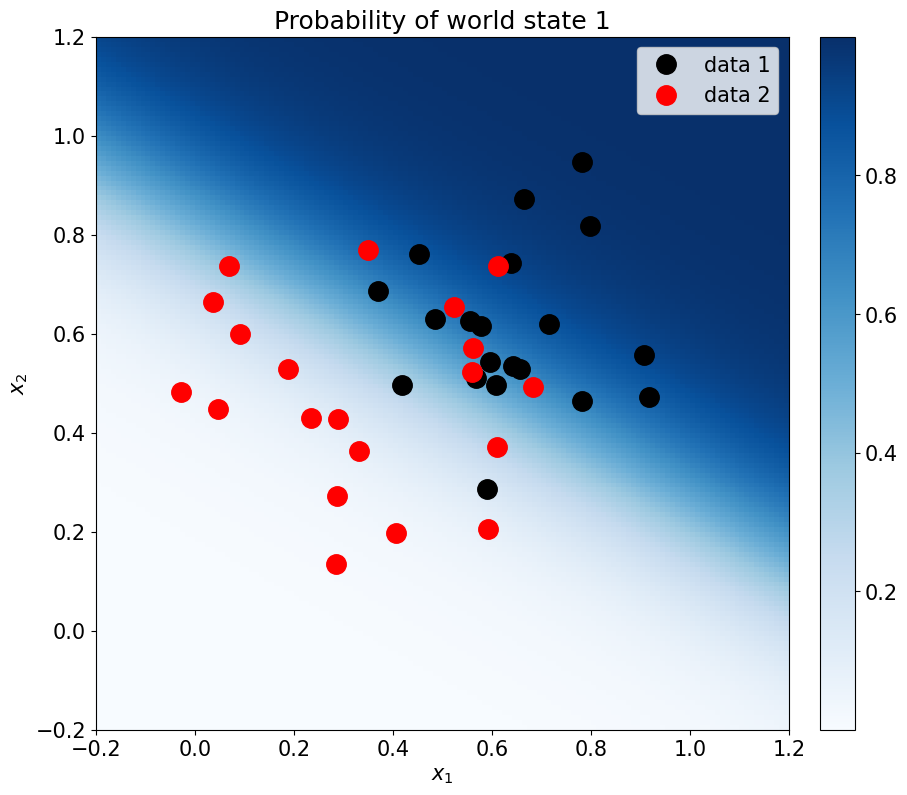

In [22]:
fig, ax = plt.subplots(figsize=(10, 9))

ax.plot(data1[0], data1[1], 'ko', fillstyle='full', label='data 1')
ax.plot(data2[0], data2[1], 'ro', fillstyle='full', label='data 2')
domain = ax.imshow(prob, origin='lower', extent=[-0.2, 1.2, -0.2, 1.2], cmap='Blues')

ax.set(xlabel='$x_1$', ylabel='$x_2$', title='Probability of world state 1')
fig.colorbar(domain, fraction=0.046, pad=0.04)
plt.legend();